<a href="https://colab.research.google.com/github/EnockCity/KCB_Data_Science_and_AI/blob/master/THE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOUSE PRICE PREDICTION IN US**

**I WILL DEVELOP TWO MODELS AND COMPARE THEIR PERFORMANCE TO TACKLE THE ASSIGNMENT.**


**Problem Statement**:
A project that is used to create a model that predicts prices of houses in the last twenty years. The model is to explain how the factors have influenced the prices. We use the S& P Case-Schiller Home Price Index as a proxy

**MODEL 1:*LINEAR REGRESSION MODE*L**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
df = pd.read_csv("/content/Cleaned_Dataset.csv")


In [93]:
df.head()

,DATE,Home_Price_Index,Year,Month,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
0,1/1/2002,117.144,2002,1,50091.00000,182565279.9,5.7,142.0,1.73,79.4,109297,65820,24.183,12.3
1,2/1/2002,117.845,2002,2,50156.00000,182796967.6,5.7,142.2,1.74,79.4,109297,65820,24.183,12.3
2,3/1/2002,118.687,2002,3,50221.00000,183077355.6,5.7,143.2,1.73,79.4,109297,65820,24.183,12.3
3,4/1/2002,119.611,2002,4,50286.00000,183259721.1,5.9,143.5,1.75,79.4,109297,65820,24.183,12.3
4,5/1/2002,120.724,2002,5,50311.33333,183508489.9,5.8,143.8,1.75,79.4,109297,65820,24.183,12.3


In [94]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [96]:
df['Year'] = df['DATE'].dt.year

In [97]:
df_yearly = df.groupby('Year').agg({
    'Home_Price_Index': 'mean',
    'Per_Capita_GDP': 'mean',
    'working_age_pop': 'mean',
    'Un_emp_Rate': 'mean',
    'Cons_Material_Cost': 'mean',
    'FEDFUNDS': 'mean',
    'Urban_Pop': 'mean',
    'Num_Households': 'sum',
    'Disposable_Income': 'mean',
    'Subsidy': 'mean',
    'old_age_pop': 'mean'
}).reset_index()

In [98]:
display(df_yearly)

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
0,2002,122.279250,50291.166667,1.837923e+08,5.783333,144.008333,1.666667,79.4,1311564,65820.0,24.183,12.3
1,2003,133.731333,51332.083333,1.869389e+08,5.991667,147.108333,1.127500,79.6,1335336,65860.0,25.930,12.3
2,2004,150.440250,52809.583333,1.887622e+08,5.541667,161.475000,1.349167,79.8,1344000,65760.0,27.201,12.3
3,2005,171.737000,54114.916667,1.910239e+08,5.083333,169.558333,3.213333,79.9,1360116,66780.0,27.651,12.4
4,2006,183.447500,55021.250000,1.932184e+08,4.608333,180.241667,4.964167,80.1,1372608,67520.0,28.604,12.4
5,2007,179.918917,55579.750000,1.956629e+08,4.616667,183.175000,5.019167,80.3,1392132,68610.0,29.512,12.5
6,2008,164.057417,54915.583333,1.966913e+08,5.800000,196.441667,1.927500,80.4,1401396,66280.0,29.876,12.7
7,2009,148.545083,53251.000000,1.978955e+08,9.283333,189.175000,0.160000,80.6,1406172,65850.0,32.883,12.9
8,2010,144.674500,54243.083333,1.991829e+08,9.608333,194.500000,0.175000,80.8,1410456,64300.0,32.669,13.0
9,2011,139.259500,54686.416667,1.999609e+08,8.933333,201.125000,0.101667,80.9,1439124,63350.0,34.230,13.3


In [99]:
df_yearly.to_csv("Final_Dataset.csv", index=False)

In [100]:
df_yearly.head()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
0,2002,122.279250,50291.166667,1.837923e+08,5.783333,144.008333,1.666667,79.4,1311564,65820.0,24.183,12.3
1,2003,133.731333,51332.083333,1.869389e+08,5.991667,147.108333,1.127500,79.6,1335336,65860.0,25.930,12.3
2,2004,150.440250,52809.583333,1.887622e+08,5.541667,161.475000,1.349167,79.8,1344000,65760.0,27.201,12.3
3,2005,171.737000,54114.916667,1.910239e+08,5.083333,169.558333,3.213333,79.9,1360116,66780.0,27.651,12.4
4,2006,183.447500,55021.250000,1.932184e+08,4.608333,180.241667,4.964167,80.1,1372608,67520.0,28.604,12.4


In [101]:
df_yearly.tail()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
16,2018,202.477750,61483.833333,2.065403e+08,3.891667,235.750000,1.831667,82.3,1531032,73030.0,38.859,15.4
17,2019,209.465167,62642.500000,2.063119e+08,3.683333,235.725000,2.158333,82.5,1542948,78250.0,40.185,15.8
18,2020,222.145833,61059.250000,2.059676e+08,8.091667,239.183333,0.375833,82.7,1541412,76660.0,44.147,16.2
19,2021,260.049250,64584.083333,2.052850e+08,5.366667,303.412750,0.080000,82.9,1550688,76330.0,45.299,16.7
20,2022,298.488333,65480.500000,2.073061e+08,3.641667,341.533250,1.683333,83.1,1574424,74580.0,48.021,17.1


In [102]:
df_yearly.isnull().sum()

Year                  0
Home_Price_Index      0
Per_Capita_GDP        0
working_age_pop       0
Un_emp_Rate           0
Cons_Material_Cost    0
FEDFUNDS              0
Urban_Pop             0
Num_Households        0
Disposable_Income     0
Subsidy               0
old_age_pop           0
dtype: int64

In [103]:
df_yearly.describe()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
count,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,2012.000000,177.877885,57049.416667,1.993721e+08,6.001190,209.573222,1.319008,81.185714,1.449249e+06,68776.666667,34.177714,13.952381
std,6.204837,42.823412,4225.616678,7.104839e+06,1.846679,46.498776,1.508093,1.140739,7.972113e+04,4615.260917,6.416538,1.569911
min,2002.000000,122.279250,50291.166667,1.837923e+08,3.641667,144.008333,0.080000,79.400000,1.311564e+06,63350.000000,24.183000,12.300000
25%,2007.000000,148.545083,54243.083333,1.956629e+08,4.616667,183.175000,0.140000,80.300000,1.392132e+06,65760.000000,29.512000,12.500000
50%,2012.000000,171.737000,55579.750000,2.014743e+08,5.541667,205.825000,1.001667,81.100000,1.453008e+06,66780.000000,33.283000,13.600000
75%,2017.000000,191.398000,60134.000000,2.055533e+08,7.358333,221.641667,1.831667,82.100000,1.514688e+06,72090.000000,37.550000,15.100000
max,2022.000000,298.488333,65480.500000,2.073061e+08,9.608333,341.533250,5.019167,83.100000,1.574424e+06,78250.000000,48.021000,17.100000


In [104]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                21 non-null     int64  
 1   Home_Price_Index    21 non-null     float64
 2   Per_Capita_GDP      21 non-null     float64
 3   working_age_pop     21 non-null     float64
 4   Un_emp_Rate         21 non-null     float64
 5   Cons_Material_Cost  21 non-null     float64
 6   FEDFUNDS            21 non-null     float64
 7   Urban_Pop           21 non-null     float64
 8   Num_Households      21 non-null     int64  
 9   Disposable_Income   21 non-null     float64
 10  Subsidy             21 non-null     float64
 11  old_age_pop         21 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 2.1 KB


In [105]:
display(df_yearly.shape)

(21, 12)

In [106]:
df_yearly.count()

Year                  21
Home_Price_Index      21
Per_Capita_GDP        21
working_age_pop       21
Un_emp_Rate           21
Cons_Material_Cost    21
FEDFUNDS              21
Urban_Pop             21
Num_Households        21
Disposable_Income     21
Subsidy               21
old_age_pop           21
dtype: int64

Text(0.5, 1.0, 'Home Price Index Over Years')

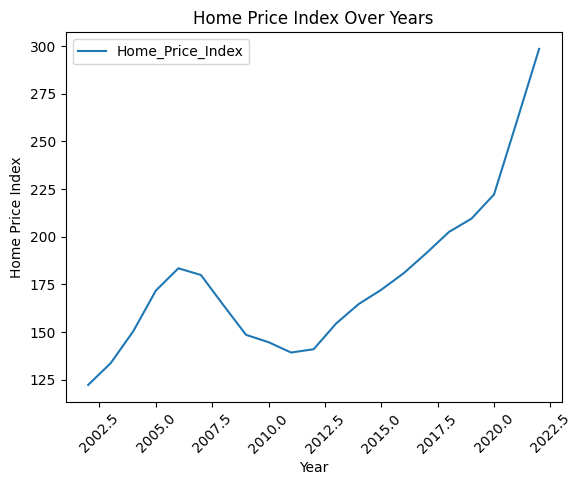

In [107]:
df_yearly.plot(x="Year", y="Home_Price_Index")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Home Price Index")
plt.title("Home Price Index Over Years")

In [109]:
features = ["Per_Capita_GDP", "working_age_pop", "Un_emp_Rate",
            "Cons_Material_Cost", "FEDFUNDS", "Urban_Pop",
            "Num_Households", "Disposable_Income", "Subsidy", "old_age_pop"]


target = "Home_Price_Index"

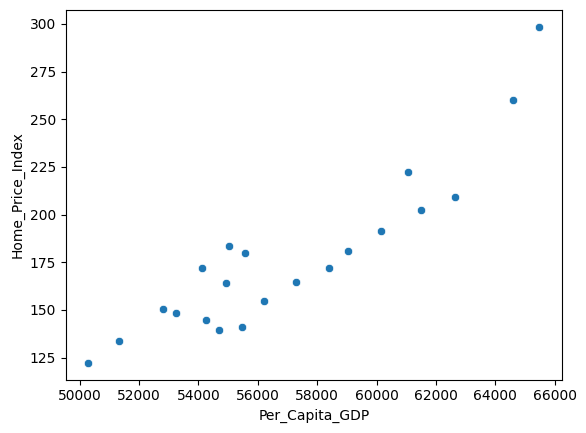

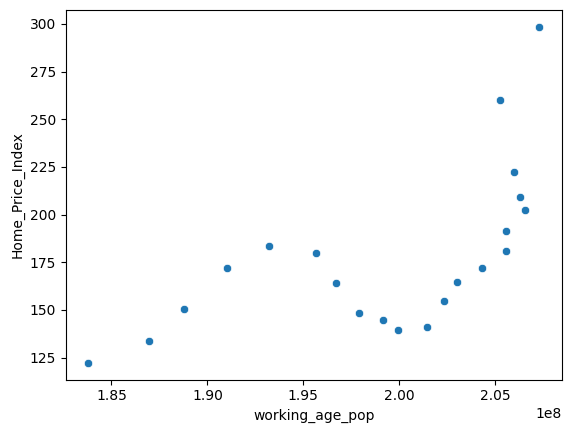

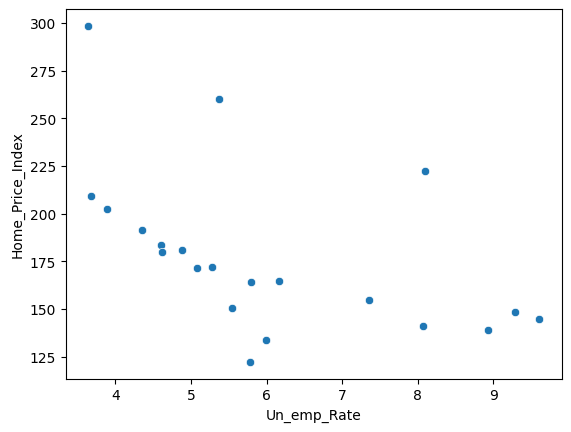

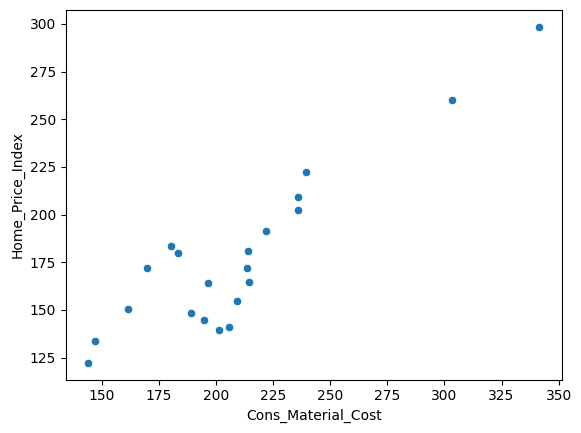

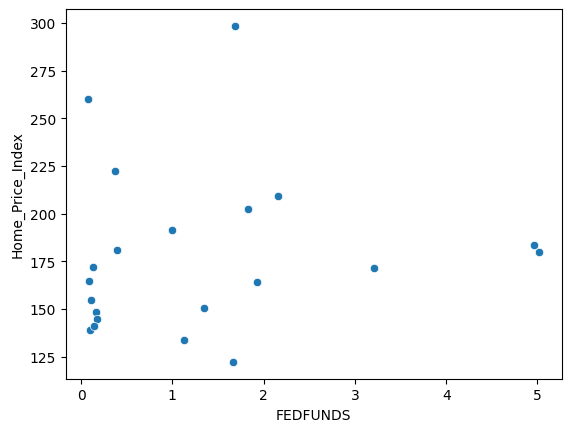

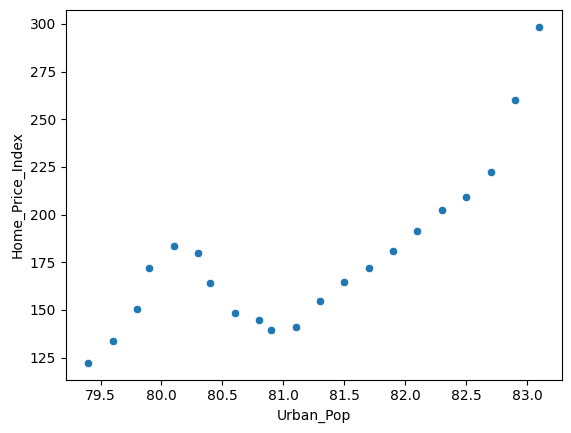

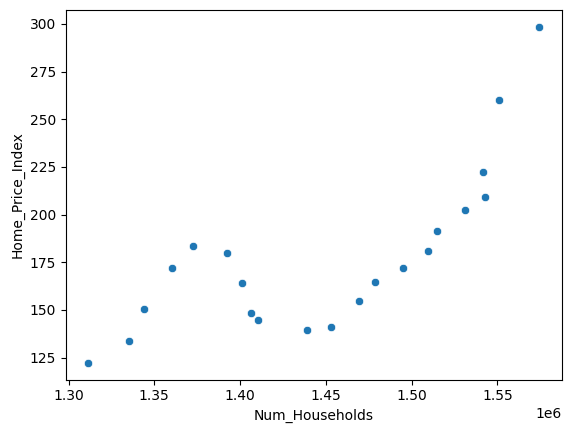

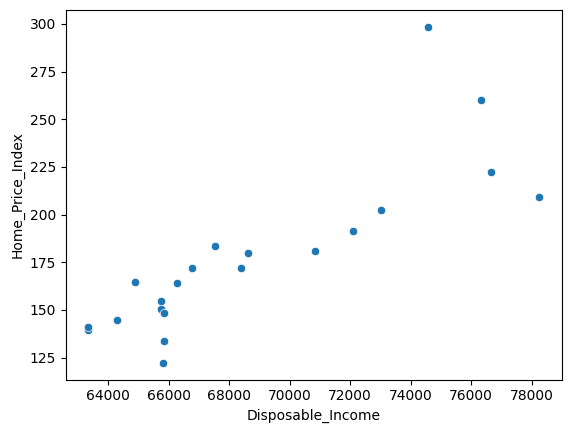

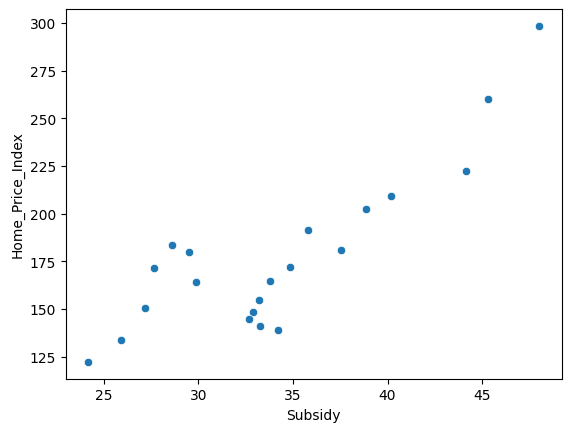

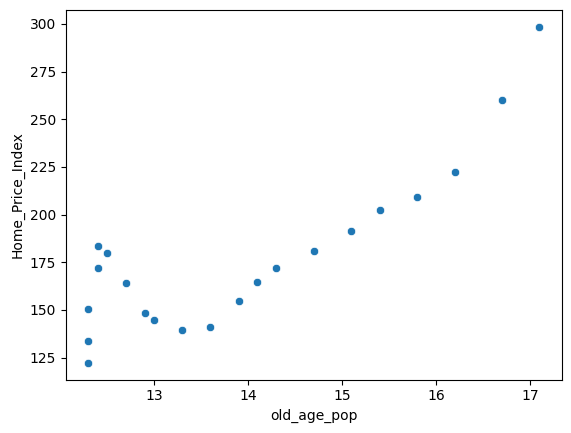

In [110]:
for feature in features:
  sns.scatterplot(x = df_yearly[feature], y = df_yearly[target])
  plt.show()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df_yearly[features], df_yearly[target], test_size=0.1, random_state=42)

In [113]:
model = LinearRegression().fit(X_train,y_train)

#model.fit(X_train, y_train)
print(model.__dict__)

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['Per_Capita_GDP', 'working_age_pop', 'Un_emp_Rate',
       'Cons_Material_Cost', 'FEDFUNDS', 'Urban_Pop', 'Num_Households',
       'Disposable_Income', 'Subsidy', 'old_age_pop'], dtype=object), 'n_features_in_': 10, 'coef_': array([-3.17103020e-03, -2.61079695e-06, -3.59799026e+00,  6.84449467e-01,
        6.13105532e+00,  4.57684675e+01, -2.65515421e-04,  2.67096642e-03,
        1.42891540e+00, -8.60088410e+00]), 'rank_': 10, 'singular_': array([2.60774368e+07, 8.71820969e+04, 9.27363916e+03, 3.57625641e+03,
       5.48102194e+01, 4.87826420e+00, 3.04393105e+00, 1.85087232e+00,
       3.39364790e-01, 9.57409880e-02]), 'intercept_': -2691.9884985000303}


In [114]:
y_pred = model.predict(X_test)
print(y_pred)

[147.01218557 228.80617396 191.99541247]


In [115]:
print("Slope = ", model.coef_)
print("Intercept = ", model.intercept_)

Slope =  [-3.17103020e-03 -2.61079695e-06 -3.59799026e+00  6.84449467e-01
  6.13105532e+00  4.57684675e+01 -2.65515421e-04  2.67096642e-03
  1.42891540e+00 -8.60088410e+00]
Intercept =  -2691.9884985000303


In [116]:
y_pred = model.predict(X_test)
df_yearly = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_yearly

,Actual,Predicted
0,122.279250,147.012186
17,209.465167,228.806174
15,191.398000,191.995412


In [117]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 328.7165221299871
R-squared: 0.7671467749494395


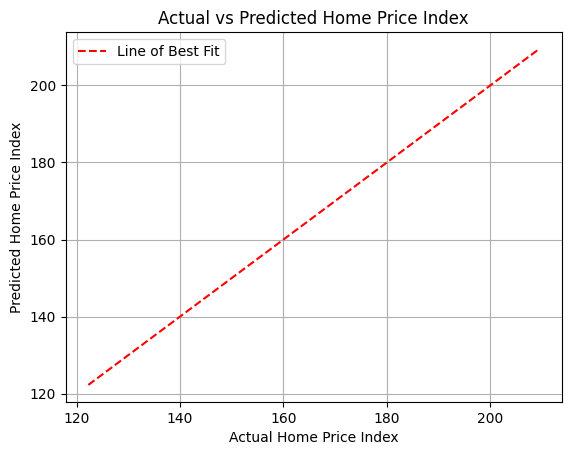

In [118]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Line of Best Fit')

plt.xlabel('Actual Home Price Index')
plt.ylabel('Predicted Home Price Index')
plt.title('Actual vs Predicted Home Price Index')
plt.legend()
plt.grid(True)
plt.show()

**Model 2: RandomForestRegression Model**  

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Loading and reading the dataset
df = pd.read_csv("/content/Final_Dataset.csv")

In [56]:
#Displaying the first n rows of the dataset
df.head()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
0,2002,122.279250,50291.166667,1.837923e+08,5.783333,144.008333,1.666667,79.4,1311564,65820.0,24.183,12.3
1,2003,133.731333,51332.083333,1.869389e+08,5.991667,147.108333,1.127500,79.6,1335336,65860.0,25.930,12.3
2,2004,150.440250,52809.583333,1.887622e+08,5.541667,161.475000,1.349167,79.8,1344000,65760.0,27.201,12.3
3,2005,171.737000,54114.916667,1.910239e+08,5.083333,169.558333,3.213333,79.9,1360116,66780.0,27.651,12.4
4,2006,183.447500,55021.250000,1.932184e+08,4.608333,180.241667,4.964167,80.1,1372608,67520.0,28.604,12.4


In [57]:
# Displaying the last n rows of the dataset
df.tail()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
16,2018,202.477750,61483.833333,2.065403e+08,3.891667,235.750000,1.831667,82.3,1531032,73030.0,38.859,15.4
17,2019,209.465167,62642.500000,2.063119e+08,3.683333,235.725000,2.158333,82.5,1542948,78250.0,40.185,15.8
18,2020,222.145833,61059.250000,2.059676e+08,8.091667,239.183333,0.375833,82.7,1541412,76660.0,44.147,16.2
19,2021,260.049250,64584.083333,2.052850e+08,5.366667,303.412750,0.080000,82.9,1550688,76330.0,45.299,16.7
20,2022,298.488333,65480.500000,2.073061e+08,3.641667,341.533250,1.683333,83.1,1574424,74580.0,48.021,17.1


In [58]:
# Check the shape of the dataset;
# display the no.of rows and columns as a tuple

df.shape

(21, 12)

In [59]:
# Dsplay the summary of the series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                21 non-null     int64  
 1   Home_Price_Index    21 non-null     float64
 2   Per_Capita_GDP      21 non-null     float64
 3   working_age_pop     21 non-null     float64
 4   Un_emp_Rate         21 non-null     float64
 5   Cons_Material_Cost  21 non-null     float64
 6   FEDFUNDS            21 non-null     float64
 7   Urban_Pop           21 non-null     float64
 8   Num_Households      21 non-null     int64  
 9   Disposable_Income   21 non-null     float64
 10  Subsidy             21 non-null     float64
 11  old_age_pop         21 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 2.1 KB


In [60]:
# Display the descriptive statistics for tth dataset
df.describe()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
count,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,2012.000000,177.877885,57049.416667,1.993721e+08,6.001190,209.573222,1.319008,81.185714,1.449249e+06,68776.666667,34.177714,13.952381
std,6.204837,42.823412,4225.616678,7.104839e+06,1.846679,46.498776,1.508093,1.140739,7.972113e+04,4615.260917,6.416538,1.569911
min,2002.000000,122.279250,50291.166667,1.837923e+08,3.641667,144.008333,0.080000,79.400000,1.311564e+06,63350.000000,24.183000,12.300000
25%,2007.000000,148.545083,54243.083333,1.956629e+08,4.616667,183.175000,0.140000,80.300000,1.392132e+06,65760.000000,29.512000,12.500000
50%,2012.000000,171.737000,55579.750000,2.014743e+08,5.541667,205.825000,1.001667,81.100000,1.453008e+06,66780.000000,33.283000,13.600000
75%,2017.000000,191.398000,60134.000000,2.055533e+08,7.358333,221.641667,1.831667,82.100000,1.514688e+06,72090.000000,37.550000,15.100000
max,2022.000000,298.488333,65480.500000,2.073061e+08,9.608333,341.533250,5.019167,83.100000,1.574424e+06,78250.000000,48.021000,17.100000


In [61]:
# Check if there are null values and return their count
df.isnull().sum()

Year                  0
Home_Price_Index      0
Per_Capita_GDP        0
working_age_pop       0
Un_emp_Rate           0
Cons_Material_Cost    0
FEDFUNDS              0
Urban_Pop             0
Num_Households        0
Disposable_Income     0
Subsidy               0
old_age_pop           0
dtype: int64

In [62]:
# Return the count of all non-null values in each column
df.count()

Year                  21
Home_Price_Index      21
Per_Capita_GDP        21
working_age_pop       21
Un_emp_Rate           21
Cons_Material_Cost    21
FEDFUNDS              21
Urban_Pop             21
Num_Households        21
Disposable_Income     21
Subsidy               21
old_age_pop           21
dtype: int64

In [17]:
# Check the correlations of the columns
df.corr()

,Year,Home_Price_Index,Per_Capita_GDP,working_age_pop,Un_emp_Rate,Cons_Material_Cost,FEDFUNDS,Urban_Pop,Num_Households,Disposable_Income,Subsidy,old_age_pop
Year,1.000000,0.771881,0.949615,0.951781,-0.201745,0.898240,-0.372394,0.998856,0.996300,0.749539,0.962879,0.968069
Home_Price_Index,0.771881,1.000000,0.908423,0.622775,-0.510465,0.903956,0.110131,0.793133,0.753849,0.836923,0.850567,0.847880
Per_Capita_GDP,0.949615,0.908423,1.000000,0.859279,-0.444339,0.928024,-0.121590,0.958627,0.945756,0.854424,0.939219,0.960851
working_age_pop,0.951781,0.622775,0.859279,1.000000,-0.096038,0.799199,-0.378022,0.938774,0.963861,0.585390,0.873837,0.846203
Un_emp_Rate,-0.201745,-0.510465,-0.444339,-0.096038,1.000000,-0.263290,-0.549021,-0.226029,-0.230985,-0.538036,-0.151104,-0.299812
Cons_Material_Cost,0.898240,0.903956,0.928024,0.799199,-0.263290,1.000000,-0.231014,0.904723,0.882387,0.690808,0.945601,0.918696
FEDFUNDS,-0.372394,0.110131,-0.121590,-0.378022,-0.549021,-0.231014,1.000000,-0.354706,-0.355178,0.085011,-0.330436,-0.320890
Urban_Pop,0.998856,0.793133,0.958627,0.938774,-0.226029,0.904723,-0.354706,1.000000,0.993336,0.774169,0.968039,0.977065
Num_Households,0.996300,0.753849,0.945756,0.963861,-0.230985,0.882387,-0.355178,0.993336,1.000000,0.733585,0.945816,0.954183
Disposable_Income,0.749539,0.836923,0.854424,0.585390,-0.538036,0.690808,0.085011,0.774169,0.733585,1.000000,0.772322,0.835746


In [18]:
# Count the total number of occurrences
df.value_counts()

Year  Home_Price_Index  Per_Capita_GDP  working_age_pop  Un_emp_Rate  Cons_Material_Cost  FEDFUNDS  Urban_Pop  Num_Households  Disposable_Income  Subsidy  old_age_pop
2002  122.279250        50291.166667    1.837923e+08     5.783333     144.008333          1.666667  79.4       1311564         65820.0            24.183   12.3           1
2013  154.520750        56212.250000    2.023260e+08     7.358333     209.275000          0.107500  81.3       1469508         65740.0            33.213   13.9           1
2021  260.049250        64584.083333    2.052850e+08     5.366667     303.412750          0.080000  82.9       1550688         76330.0            45.299   16.7           1
2020  222.145833        61059.250000    2.059676e+08     8.091667     239.183333          0.375833  82.7       1541412         76660.0            44.147   16.2           1
2019  209.465167        62642.500000    2.063119e+08     3.683333     235.725000          2.158333  82.5       1542948         78250.0           

Text(0.5, 1.0, 'Home Price Index Over Years')

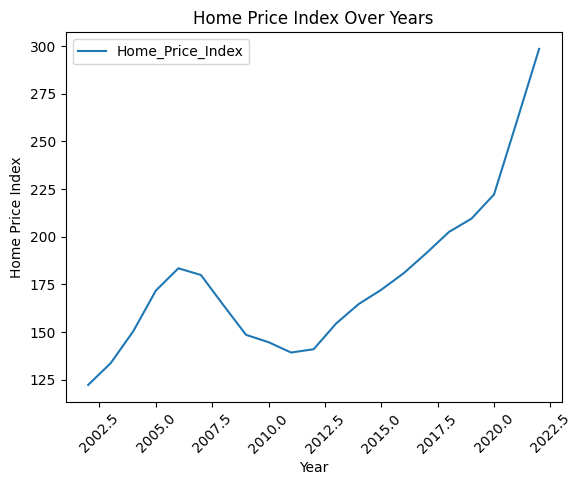

In [63]:
# Show the data visually
df.plot(x="Year", y="Home_Price_Index")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Home Price Index")
plt.title("Home Price Index Over Years")

In [64]:
#Define the features(predictor variables) and target(predicted)
features = ["Per_Capita_GDP", "working_age_pop", "Un_emp_Rate",
            "Cons_Material_Cost", "FEDFUNDS", "Urban_Pop",
            "Num_Households", "Disposable_Income", "Subsidy", "old_age_pop"]
target = "Home_Price_Index"

In [65]:
X = df[features]
y = df[target]

In [66]:
#Split the dataset into training and testing sets (90% train, 10% test)
#X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [75]:
# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

In [76]:
# Train the model
rf_model.fit(X_train, y_train)
print(rf_model.__dict__)

{'estimator': DecisionTreeRegressor(), 'n_estimators': 100, 'estimator_params': ('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), 'base_estimator': 'deprecated', 'bootstrap': True, 'oob_score': False, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False, 'class_weight': None, 'max_samples': None, 'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'ccp_alpha': 0.0, 'feature_names_in_': array(['Per_Capita_GDP', 'working_age_pop', 'Un_emp_Rate',
       'Cons_Material_Cost', 'FEDFUNDS', 'Urban_Pop', 'Num_Households',
       'Disposable_Income', 'Subsidy', 'old_age_pop'], dtype=object), 'n_features_in_': 10, 'n_outputs_': 1, 'estimator_': DecisionTreeRegressor(), 'estimators_': [DecisionTr

In [77]:
# Access feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for i, feature in enumerate(features):
    print(f"{feature}: {feature_importances[i]}")

Per_Capita_GDP: 0.09853686445354427
working_age_pop: 0.014920787347818997
Un_emp_Rate: 0.1452447224944465
Cons_Material_Cost: 0.08162269757412575
FEDFUNDS: 0.010123662399831545
Urban_Pop: 0.07964558233183401
Num_Households: 0.08165257909523942
Disposable_Income: 0.22541772664801946
Subsidy: 0.13340269333961827
old_age_pop: 0.12943268431552174


In [78]:
#Make some predctions using the test data
y_pred = rf_model.predict(X_test)
print("Predictions :",y_pred)

Predictions : [147.33312333 231.85832583 191.0054575 ]


In [79]:
# Compare the actual and predicted values of the target variable
y_pred = rf_model.predict(X_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,122.279250,147.333123
17,209.465167,231.858326
15,191.398000,191.005458


In [80]:
#Test the model using the testing data
model_score = rf_model.score(X_test, y_test)
print("Model score is:", model_score)

#Alternatively,Test model as below.
# Both methods gives the same output
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Model score is: 0.733344573280827
Mean squared error: 376.4347453602218
R-squared: 0.733344573280827


In [89]:
#Make some predictions
print("Predicted home price index for the first 3 samples:")
print(y_pred[: 3])

Predicted home price index for the first 3 samples:
[147.33312333 231.85832583 191.0054575 ]


**GOODNESS OF THE MODELS**
Even though both models produces relatively similar results,Linear Regression Model has higher R-squared score of 77% while Random Forest Regression produces R-squared score of 73%.I would there recommend use of Linear Regression Model for better results in this specific task.
LinearRegression Model produces

**INTERPRETATION OF THE FACTORS.**

Based on the results from the model,the factors impact the prices of houses as follows:
1**.Disposable Income**
Higher disposable income levels can boost housing demand as individuals have more purchasing power to afford homes. Areas with higher disposable incomes may experience increased housing demand, leading to higher home prices.
2.**Unemployment Rate**
High unemployment rates can lead to decreased demand for housing as people may struggle to afford homes. Consequently, areas with lower unemployment rates tend to have higher housing demand and, consequently, higher home prices.
3.**Subsidies**
 Government subsidies or incentives aimed at promoting homeownership can impacts housing affordability and demand. Subsidies may increase housing affordability for buyers, stimulating demand and potentially leading to higher home price.
4.**Old age population**
Older populations may seek different types of housing, such as retirement communities or accessible homes, impacting the demand and prices of such properties.
5.**Number of households**
An increase in the number of households leads to a decrease in demand since the population has a variety to choose from.This translates to decrease in the prices of the houses.
6.**Cost of construction materials**
Higher material costs increase construction expenses, which are typically passed on to homebuyers in the form of higher home prices. Areas experiencing increases in construction material costs may see corresponding increases in home prices.
6.**Urban Population**
Urbanization often leads to increased housing demand in urban areas. Limited land availability and higher population densities in cities can result in higher housing costs. Additionally, urban areas offer access to amenities and job opportunities, further driving up demand and home prices.
7.**FEDFUNDS (Federal Funds Rate)**
The federal funds rate set by the Federal Reserve influences mortgage interest rates. Changes in interest rates can affect borrowing costs for homebuyers. Lower interest rates stimulate housing demand by making mortgages more affordable, leading to higher home prices.
8.**Working Age Population**
A larger working-age population often indicates a higher demand for housing. People in the workforce typically form households and seek accommodation, driving up demand for homes. Areas with a significant working-age population may experience increased competition for housing, resulting in higher home prices
9.**Per Capita GDP**
 Higher per capita GDP typically signifies a stronger economy with higher income levels. This increased prosperity can lead to greater demand for housing as individuals have more purchasing power. Consequently, home prices tend to rise in areas with higher per capita GDP due to increased demand.